In [26]:
from PIL import Image # 影像處理套件
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud # 文字雲

!pip install jieba
import jieba
import jieba.analyse
from collections import Counter

from IPython.display import Image
Image(filename='wordcloud.png')

import requests
import json
import time
import pandas as pd

import re

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [27]:
!python --version
!pip --version
!pip install openai

Python 3.9.13
pip 22.2.2 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.9)

Defaulting to user installation because normal site-packages is not writeable


In [28]:
import openai

In [29]:
with open('03.txt', 'r', encoding='utf-8') as fh:
    tmp = fh.read()
    itemlist = tmp.split(',')

In [30]:
itemlist

['Music streaming royalties to be discussed by government\nThe music industry has committed to improving metadata for tracking songs on music streaming platforms',
 ' following widespread criticism from artists.\nThe writers',
 ' performers and producers of songs will now be consistently identified.\nThese creators say they do not receive their fair share of royalties when tracks are played on streaming services such as Spotify and Apple Music.\nIt comes as the government launches a group to look into these concerns.\nSir John Whittingdale',
 ' minister for the creative industries',
 ' said the move would help the UK to "offer viable career opportunities".\n"This landmark agreement on streaming metadata is a step towards ensuring UK musicians in the digital age are fairly credited and compensated for their contributions and creativity',
 '" he said.\n"I\'m pleased to be bringing the industry together so we can explore wider issues around music creator remuneration more generally."\nCom

In [31]:
keyfile = open("key.txt", "r")
key = keyfile.readline()
openai.api_key = key

In [32]:
data = [itemlist[0:3200], itemlist[3201:6400]]

In [33]:
data[0]

['Music streaming royalties to be discussed by government\nThe music industry has committed to improving metadata for tracking songs on music streaming platforms',
 ' following widespread criticism from artists.\nThe writers',
 ' performers and producers of songs will now be consistently identified.\nThese creators say they do not receive their fair share of royalties when tracks are played on streaming services such as Spotify and Apple Music.\nIt comes as the government launches a group to look into these concerns.\nSir John Whittingdale',
 ' minister for the creative industries',
 ' said the move would help the UK to "offer viable career opportunities".\n"This landmark agreement on streaming metadata is a step towards ensuring UK musicians in the digital age are fairly credited and compensated for their contributions and creativity',
 '" he said.\n"I\'m pleased to be bringing the industry together so we can explore wider issues around music creator remuneration more generally."\nCom

In [45]:
def chatgptfn(sub_list):
    result = ''
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an assistant"},
            {"role": "user", "content": f"{sub_list} :translate it into traditional chinese. The translation must be in TRADITIONAL CHINESE"}
        ]
    )
    for choice in response.choices:
        result += choice.message.content
    return result

In [46]:
for i in range(0,2):
    data[i] = chatgptfn(data[i])

In [47]:
data[0]

'政府將討論音樂流媒體版權費用。音樂行業已經承諾改進音樂流媒體平台上歌曲追踪的元數據，以回應藝術家們廣泛批評，從而確保作品的創作者能夠被一直準確地識別。這些創作者表示，在像Spotify和Apple Music這樣的流媒體服務上播放歌曲時，他們沒有獲得公平的版權費用。隨著政府成立一個小組來調查這些問題，創造性產業大臣約翰·威廉戴爾爵士表示，這將有助於英國為“數字時代的音樂人提供可行的職業機會”。政府自2019年以來一直在調查音樂流媒體問題，2021年確定了版權費用上的“不平衡”，並成立了一個工作小組專門研究藝術家的報酬問題。調查該行業的文化、媒體和體育選擇委員會主席卡羅琳·迪納奈吉爵士表示，這是一個“歡迎的步驟，朝著解決音樂人和詞曲作者因報酬不足而感到失望的問題邁進”。但她補充說，它應該導致具體的變革，而不是僅僅成為一個“虛口說法”。2020年，政府聽取了吉他手、製作人和詞曲作者Nile Rodgers等音樂人的意見，他表示唱片公司從流媒體服務獲得的版權費用中保留了高達82%。英國唱片業協會的首席執行官Sophie Jones表示，她擔心這可能會在人工智能面臨增加競爭的時候，妨礙投資。她告訴新聞公報說幾項研究表明，流媒體服務使消費者和藝術家受益，並使唱片公司對藝術家的支付比以往任何時候都更多。前Spotify首席經濟學家Will Page表示，音樂業目前正在就資金分配方式展開辯論：“對於藝術家來說，如果你在英國獲得1%的所有流媒體，...你就可以獲得在英國產生的所有現金的1%。”這是因為藝術家不會在Spotify上每次播放一首歌曲時獲得一定的報酬。根據其網站上的說明：“藝術家收到的版權費用可能會因其音樂的流媒體方式或與唱片公司或分銷商的協議的差異而有所不同。”Page先生指出了一種替代模型，即用戶中心付款系統，這可能更加公平。他說，這將涵蓋一個人訂閱費用所聽的音樂，使它成為“我的錢，我的音樂”。這將導致一個人的訂閱費用被分割成他們所聽的藝術家之間。但他也對這個工作小組是否能夠帶來實際變化表示擔憂：“我們進行了為期三年的文化、媒體和體育選擇委員會調查，聽取了無數的口頭聽證會、書面提交、PDF報告，現在我們正在重複做同樣的事情。”'

In [48]:
import json

# 將 data[0] 轉換為 JSON 格式
json_data = json.dumps(data[0], ensure_ascii=False)

# 將 JSON 資料寫入檔案
with open('data.json', 'w', encoding='utf-8') as file:
    file.write(json_data)
    
json_data

'"政府將討論音樂流媒體版權費用。音樂行業已經承諾改進音樂流媒體平台上歌曲追踪的元數據，以回應藝術家們廣泛批評，從而確保作品的創作者能夠被一直準確地識別。這些創作者表示，在像Spotify和Apple Music這樣的流媒體服務上播放歌曲時，他們沒有獲得公平的版權費用。隨著政府成立一個小組來調查這些問題，創造性產業大臣約翰·威廉戴爾爵士表示，這將有助於英國為“數字時代的音樂人提供可行的職業機會”。政府自2019年以來一直在調查音樂流媒體問題，2021年確定了版權費用上的“不平衡”，並成立了一個工作小組專門研究藝術家的報酬問題。調查該行業的文化、媒體和體育選擇委員會主席卡羅琳·迪納奈吉爵士表示，這是一個“歡迎的步驟，朝著解決音樂人和詞曲作者因報酬不足而感到失望的問題邁進”。但她補充說，它應該導致具體的變革，而不是僅僅成為一個“虛口說法”。2020年，政府聽取了吉他手、製作人和詞曲作者Nile Rodgers等音樂人的意見，他表示唱片公司從流媒體服務獲得的版權費用中保留了高達82%。英國唱片業協會的首席執行官Sophie Jones表示，她擔心這可能會在人工智能面臨增加競爭的時候，妨礙投資。她告訴新聞公報說幾項研究表明，流媒體服務使消費者和藝術家受益，並使唱片公司對藝術家的支付比以往任何時候都更多。前Spotify首席經濟學家Will Page表示，音樂業目前正在就資金分配方式展開辯論：“對於藝術家來說，如果你在英國獲得1%的所有流媒體，...你就可以獲得在英國產生的所有現金的1%。”這是因為藝術家不會在Spotify上每次播放一首歌曲時獲得一定的報酬。根據其網站上的說明：“藝術家收到的版權費用可能會因其音樂的流媒體方式或與唱片公司或分銷商的協議的差異而有所不同。”Page先生指出了一種替代模型，即用戶中心付款系統，這可能更加公平。他說，這將涵蓋一個人訂閱費用所聽的音樂，使它成為“我的錢，我的音樂”。這將導致一個人的訂閱費用被分割成他們所聽的藝術家之間。但他也對這個工作小組是否能夠帶來實際變化表示擔憂：“我們進行了為期三年的文化、媒體和體育選擇委員會調查，聽取了無數的口頭聽證會、書面提交、PDF報告，現在我們正在重複做同樣的事情。”"'

In [49]:
import re

# 去除字串中的標點符號
cleaned_data = re.sub(r'[^\w\s]', '', data[0])
cleaned_data = cleaned_data.replace('\n', '')

# 印出處理後的結果
print(cleaned_data)

政府將討論音樂流媒體版權費用音樂行業已經承諾改進音樂流媒體平台上歌曲追踪的元數據以回應藝術家們廣泛批評從而確保作品的創作者能夠被一直準確地識別這些創作者表示在像Spotify和Apple Music這樣的流媒體服務上播放歌曲時他們沒有獲得公平的版權費用隨著政府成立一個小組來調查這些問題創造性產業大臣約翰威廉戴爾爵士表示這將有助於英國為數字時代的音樂人提供可行的職業機會政府自2019年以來一直在調查音樂流媒體問題2021年確定了版權費用上的不平衡並成立了一個工作小組專門研究藝術家的報酬問題調查該行業的文化媒體和體育選擇委員會主席卡羅琳迪納奈吉爵士表示這是一個歡迎的步驟朝著解決音樂人和詞曲作者因報酬不足而感到失望的問題邁進但她補充說它應該導致具體的變革而不是僅僅成為一個虛口說法2020年政府聽取了吉他手製作人和詞曲作者Nile Rodgers等音樂人的意見他表示唱片公司從流媒體服務獲得的版權費用中保留了高達82英國唱片業協會的首席執行官Sophie Jones表示她擔心這可能會在人工智能面臨增加競爭的時候妨礙投資她告訴新聞公報說幾項研究表明流媒體服務使消費者和藝術家受益並使唱片公司對藝術家的支付比以往任何時候都更多前Spotify首席經濟學家Will Page表示音樂業目前正在就資金分配方式展開辯論對於藝術家來說如果你在英國獲得1的所有流媒體你就可以獲得在英國產生的所有現金的1這是因為藝術家不會在Spotify上每次播放一首歌曲時獲得一定的報酬根據其網站上的說明藝術家收到的版權費用可能會因其音樂的流媒體方式或與唱片公司或分銷商的協議的差異而有所不同Page先生指出了一種替代模型即用戶中心付款系統這可能更加公平他說這將涵蓋一個人訂閱費用所聽的音樂使它成為我的錢我的音樂這將導致一個人的訂閱費用被分割成他們所聽的藝術家之間但他也對這個工作小組是否能夠帶來實際變化表示擔憂我們進行了為期三年的文化媒體和體育選擇委員會調查聽取了無數的口頭聽證會書面提交PDF報告現在我們正在重複做同樣的事情


In [50]:
import json

# 將 cleaned_data 轉換為 JSON 格式
json_clean = json.dumps(cleaned_data, ensure_ascii=False)

# 將 JSON 資料寫入檔案
with open('cleaned_data.json', 'w', encoding='utf-8') as file:
    file.write(json_clean)
    
json_clean

'"政府將討論音樂流媒體版權費用音樂行業已經承諾改進音樂流媒體平台上歌曲追踪的元數據以回應藝術家們廣泛批評從而確保作品的創作者能夠被一直準確地識別這些創作者表示在像Spotify和Apple Music這樣的流媒體服務上播放歌曲時他們沒有獲得公平的版權費用隨著政府成立一個小組來調查這些問題創造性產業大臣約翰威廉戴爾爵士表示這將有助於英國為數字時代的音樂人提供可行的職業機會政府自2019年以來一直在調查音樂流媒體問題2021年確定了版權費用上的不平衡並成立了一個工作小組專門研究藝術家的報酬問題調查該行業的文化媒體和體育選擇委員會主席卡羅琳迪納奈吉爵士表示這是一個歡迎的步驟朝著解決音樂人和詞曲作者因報酬不足而感到失望的問題邁進但她補充說它應該導致具體的變革而不是僅僅成為一個虛口說法2020年政府聽取了吉他手製作人和詞曲作者Nile Rodgers等音樂人的意見他表示唱片公司從流媒體服務獲得的版權費用中保留了高達82英國唱片業協會的首席執行官Sophie Jones表示她擔心這可能會在人工智能面臨增加競爭的時候妨礙投資她告訴新聞公報說幾項研究表明流媒體服務使消費者和藝術家受益並使唱片公司對藝術家的支付比以往任何時候都更多前Spotify首席經濟學家Will Page表示音樂業目前正在就資金分配方式展開辯論對於藝術家來說如果你在英國獲得1的所有流媒體你就可以獲得在英國產生的所有現金的1這是因為藝術家不會在Spotify上每次播放一首歌曲時獲得一定的報酬根據其網站上的說明藝術家收到的版權費用可能會因其音樂的流媒體方式或與唱片公司或分銷商的協議的差異而有所不同Page先生指出了一種替代模型即用戶中心付款系統這可能更加公平他說這將涵蓋一個人訂閱費用所聽的音樂使它成為我的錢我的音樂這將導致一個人的訂閱費用被分割成他們所聽的藝術家之間但他也對這個工作小組是否能夠帶來實際變化表示擔憂我們進行了為期三年的文化媒體和體育選擇委員會調查聽取了無數的口頭聽證會書面提交PDF報告現在我們正在重複做同樣的事情"'

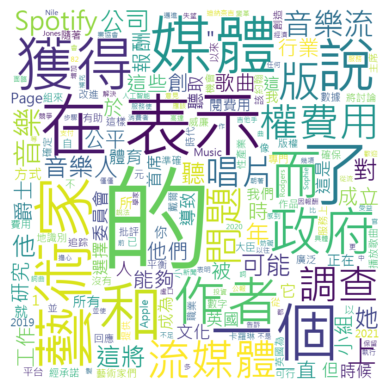

In [51]:
# 讀取檔案內容
with open('cleaned_data.json', 'r', encoding='utf-8') as f:
    output = f.read()

# 中文分詞
seg_list = jieba.cut(output, cut_all=False)
seg_list = list(seg_list)

# 計算詞頻
word_freq = {}
for word in seg_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


# 產生文字雲
font_path = 'C:/Windows/Fonts/msjh.ttc'  
# 設定字型路徑
wordcloud = WordCloud(width=800, height=800, font_path=font_path, background_color='white').generate_from_frequencies(word_freq)

# 顯示文字雲
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()